In [1]:
import os 
import re 
from scipy import ndimage, misc 
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import img_to_array


from skimage.transform import resize, rescale
import matplotlib.pyplot as plt
import numpy as np
np. random. seed(0)
import cv2 as cv2

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense ,Conv2D,MaxPooling2D ,Dropout
from tensorflow.keras.layers import Conv2DTranspose, UpSampling2D, add
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.utils import plot_model
import tensorflow as tf

print(tf.__version__)

2.12.0


In [2]:
def sorted_alphanumeric(data):  
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
    return sorted(data,key = alphanum_key)
# defining the size of the image
SIZE = 256
high_img = []
path = '/content/sample_data/HighResolution'
files = os.listdir(path)
files = sorted_alphanumeric(files)
for i in tqdm(files):    
    if i == '855.jpg':
        break
    else:    
        img = cv2.imread(path + '/'+i,1)
        # open cv reads images in BGR format so we have to convert it to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        #resizing image
        img = cv2.resize(img, (SIZE, SIZE))
        img = img.astype('float32') / 255.0
        high_img.append(img_to_array(img))

100%|██████████| 66/66 [00:00<00:00, 328.95it/s]


In [3]:
low_img = []
path = '/content/sample_data/LowResolution'
files = os.listdir(path)
files = sorted_alphanumeric(files)
for i in tqdm(files):
    if i == '855.jpg':
        break
    else: 
        img = cv2.imread(path + '/'+i,1)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        #resizing image
        img = cv2.resize(img, (SIZE, SIZE))
        img = img.astype('float32') / 255.0
        low_img.append(img_to_array(img))

100%|██████████| 66/66 [00:00<00:00, 1009.91it/s]


IndexError: ignored

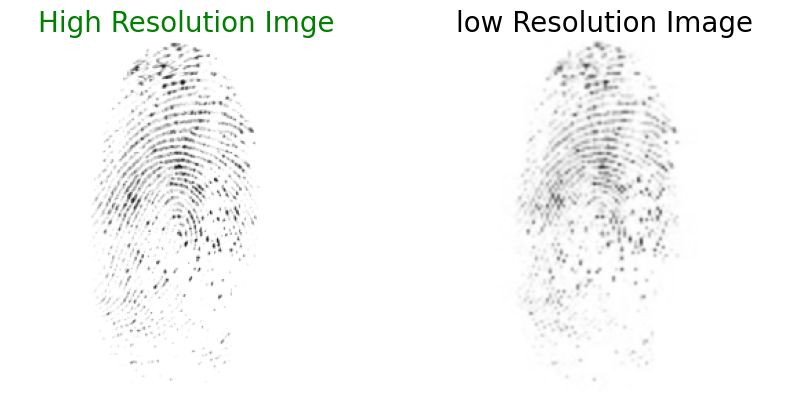

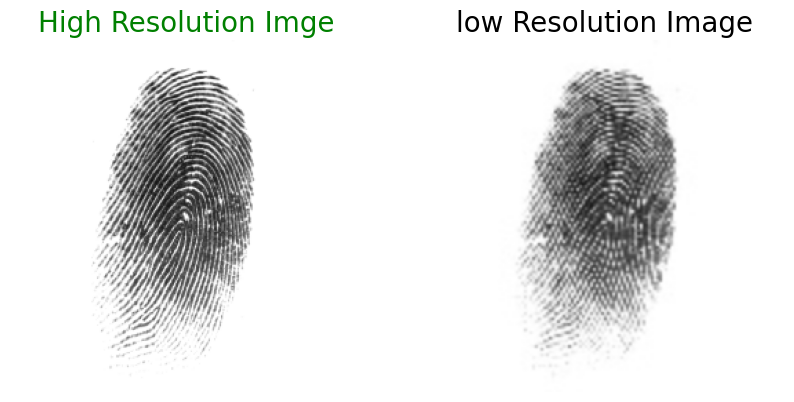

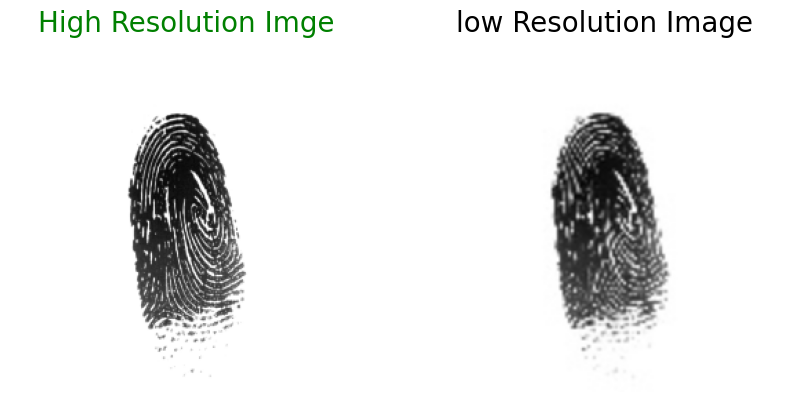

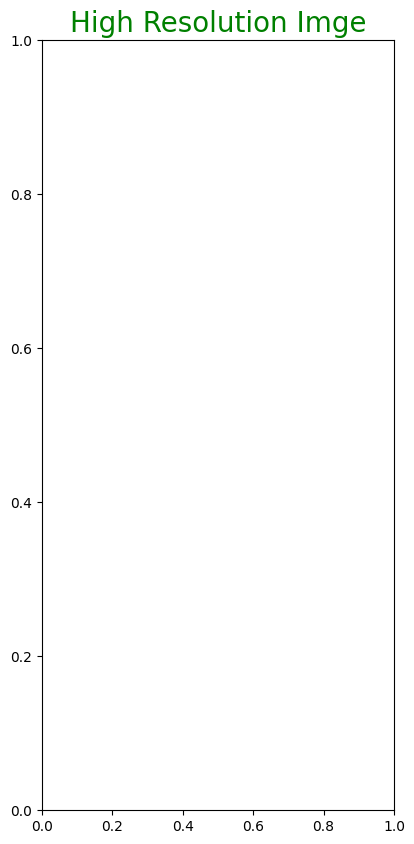

In [4]:
for i in range(4):
    a = np.random.randint(0,105)
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,1)
    plt.title('High Resolution Imge', color = 'green', fontsize = 20)
    plt.imshow(high_img[a])
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.title('low Resolution Image ', color = 'black', fontsize = 20)
    plt.imshow(low_img[a])
    plt.axis('off')

In [5]:
train_high_image = high_img[:55]
train_low_image = low_img[:55]
train_high_image = np.reshape(train_high_image,(len(train_high_image),SIZE,SIZE,3))
train_low_image = np.reshape(train_low_image,(len(train_low_image),SIZE,SIZE,3))

validation_high_image = high_img[55:60]
validation_low_image = low_img[55:60]
validation_high_image= np.reshape(validation_high_image,(len(validation_high_image),SIZE,SIZE,3))
validation_low_image = np.reshape(validation_low_image,(len(validation_low_image),SIZE,SIZE,3))


test_high_image = high_img[60:]
test_low_image = low_img[60:]
test_high_image= np.reshape(test_high_image,(len(test_high_image),SIZE,SIZE,3))
test_low_image = np.reshape(test_low_image,(len(test_low_image),SIZE,SIZE,3))

print("Shape of training images:",train_high_image.shape)
print("Shape of test images:",test_high_image.shape)
print("Shape of validation images:",validation_high_image.shape)

Shape of training images: (55, 256, 256, 3)
Shape of test images: (6, 256, 256, 3)
Shape of validation images: (5, 256, 256, 3)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 64)      15616     
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      2080      
                                                                 
 conv2d_2 (Conv2D)           (None, 256, 256, 3)       2403      
                                                                 
Total params: 20,099
Trainable params: 20,099
Non-trainable params: 0
_________________________________________________________________


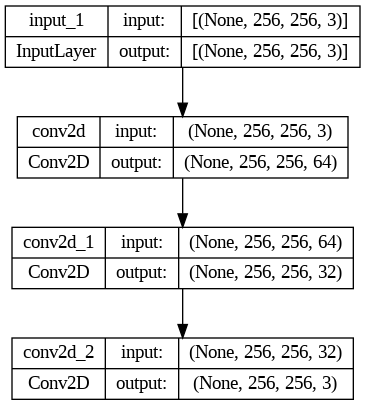

In [6]:
from keras import layers
from tensorflow.keras.utils import plot_model


#SRCNN=tf.keras.models.Sequential([tf.keras.layers.Conv2D(64,9,padding='same',activation='relu'),
 #      tf.keras.layers.Conv2D(64,1,padding='same',activation='relu'),
 #      tf.keras.layers.Conv2D(3,5,padding='same',activation='relu')])

input_img=Input(shape=(256,256,3))
l1=tf.keras.layers.Conv2D(64,9,padding='same',activation='relu') (input_img)
l2=tf.keras.layers.Conv2D(32,1,padding='same',activation='relu') (l1)
l3=tf.keras.layers.Conv2D(3,5,padding='same',activation='relu') (l2)


SRCNN=Model(input_img,l3)


def pixel_mse_loss(x,y):
    return tf.reduce_mean( (x - y) ** 2 )
SRCNN.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss=pixel_mse_loss)
SRCNN.summary()
plot_model(SRCNN, to_file ='super_res.png',show_shapes=True)

In [7]:
SRCNN.fit(train_low_image, train_high_image, epochs = 20, batch_size = 1,
          validation_data = (validation_low_image,validation_high_image))

Epoch 1/20
55/55 [==============================] - 15s 31ms/step - loss: 0.0735 - val_loss: 0.0152
Epoch 2/20
55/55 [==============================] - 1s 17ms/step - loss: 0.0131 - val_loss: 0.0090
Epoch 3/20
55/55 [==============================] - 1s 18ms/step - loss: 0.0094 - val_loss: 0.0142
Epoch 4/20
55/55 [==============================] - 1s 20ms/step - loss: 0.0084 - val_loss: 0.0066
Epoch 5/20
55/55 [==============================] - 1s 20ms/step - loss: 0.0065 - val_loss: 0.0081
Epoch 6/20
55/55 [==============================] - 1s 14ms/step - loss: 0.0061 - val_loss: 0.0059
Epoch 7/20
55/55 [==============================] - 0s 7ms/step - loss: 0.0054 - val_loss: 0.0057
Epoch 8/20
55/55 [==============================] - 0s 7ms/step - loss: 0.0051 - val_loss: 0.0055
Epoch 9/20
55/55 [==============================] - 0s 8ms/step - loss: 0.0050 - val_loss: 0.0058
Epoch 10/20
55/55 [==============================] - 0s 7ms/step - loss: 0.0050 - val_loss: 0.0054
Epoch 11/20


In [8]:
def PSNR(y_true,y_pred):
    mse=tf.reduce_mean( (y_true - y_pred) ** 2 )
    return 20 * log10(1/ (mse ** 0.5))

def log10(x):
    numerator = tf.math.log(x)
    denominator = tf.math.log(tf.constant(10, dtype=numerator.dtype))
    return numerator / denominator

def pixel_MSE(y_true,y_pred):
    return tf.reduce_mean( (y_true - y_pred) ** 2 )

[[[[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  ...

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]]


 [[[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  ...

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1

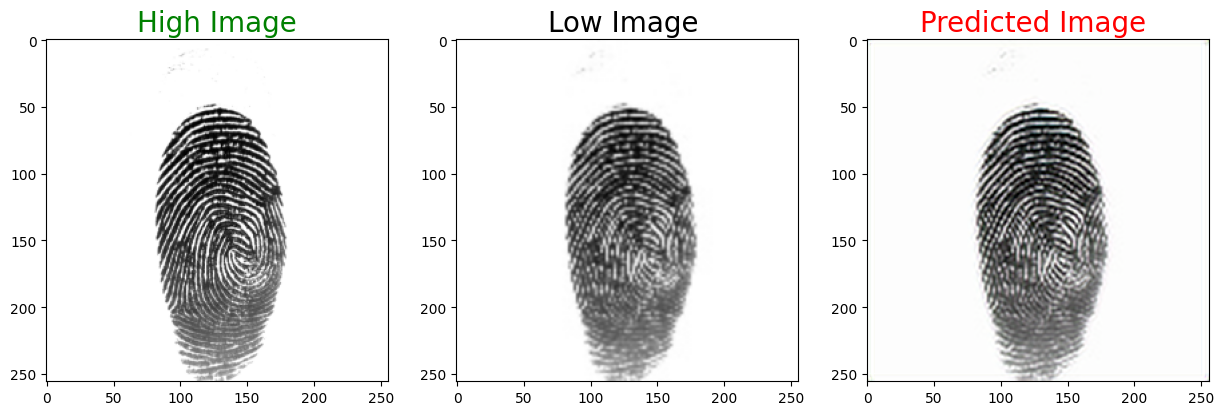

PSNR tf.Tensor(22.915266, shape=(), dtype=float32) dB SSIM tf.Tensor(0.9086639, shape=(), dtype=float32)
1
1/1 [==============================] - 0s 75ms/step


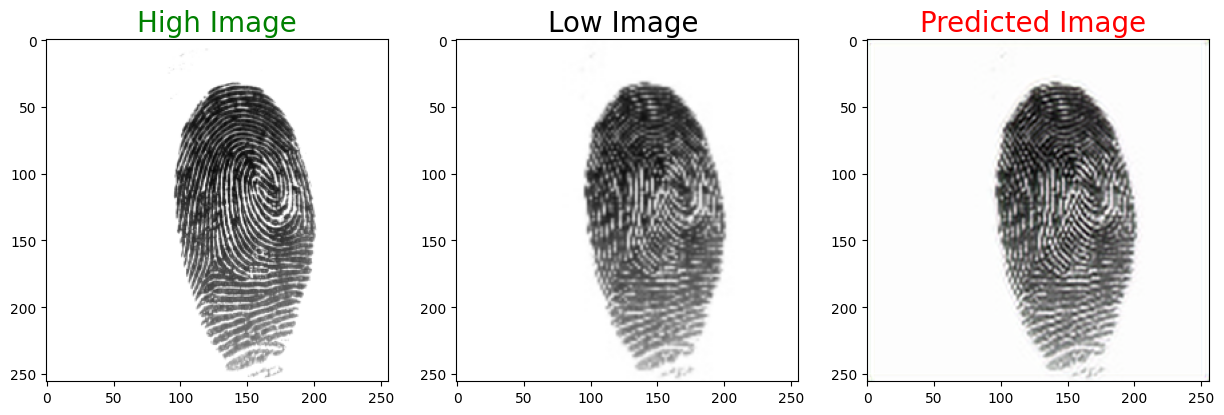

PSNR tf.Tensor(22.414797, shape=(), dtype=float32) dB SSIM tf.Tensor(0.88292044, shape=(), dtype=float32)
2
1/1 [==============================] - 0s 29ms/step


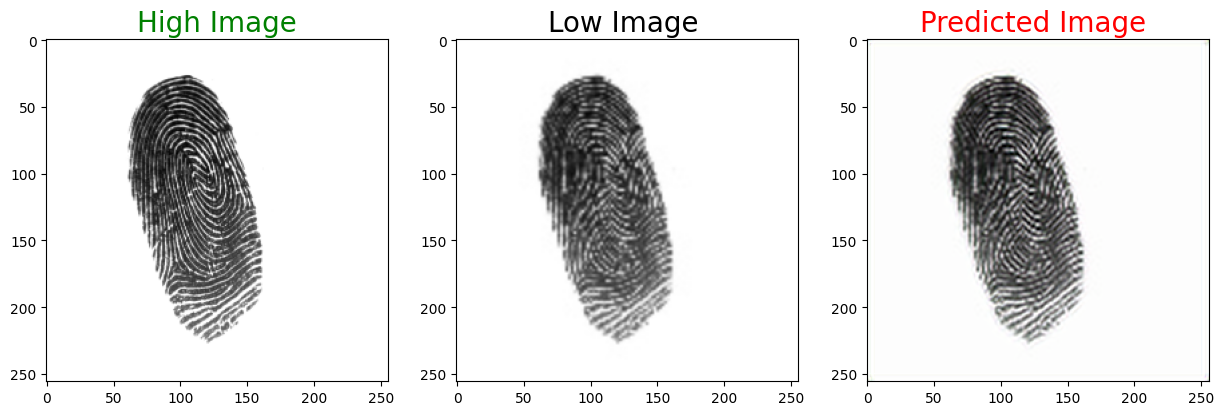

PSNR tf.Tensor(22.734737, shape=(), dtype=float32) dB SSIM tf.Tensor(0.8931344, shape=(), dtype=float32)
3
1/1 [==============================] - 0s 33ms/step


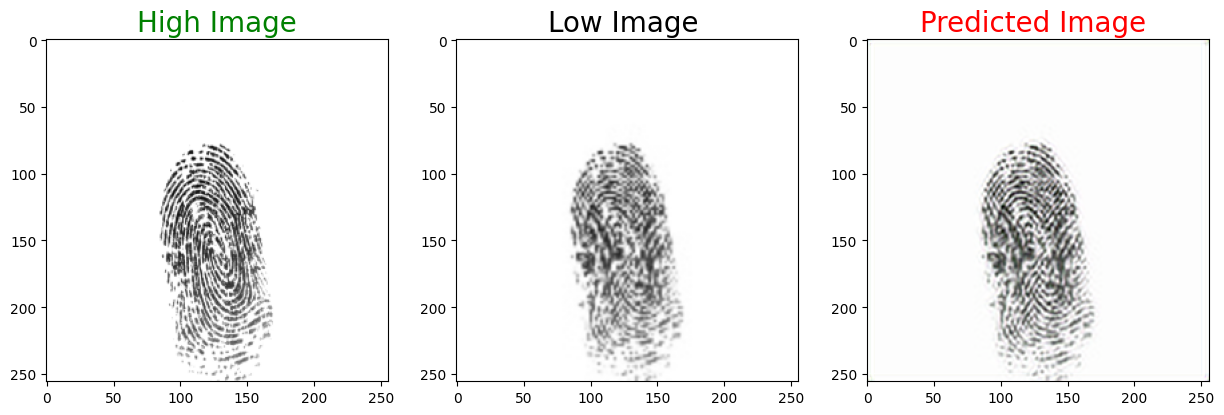

PSNR tf.Tensor(22.20018, shape=(), dtype=float32) dB SSIM tf.Tensor(0.914926, shape=(), dtype=float32)
4
1/1 [==============================] - 0s 47ms/step


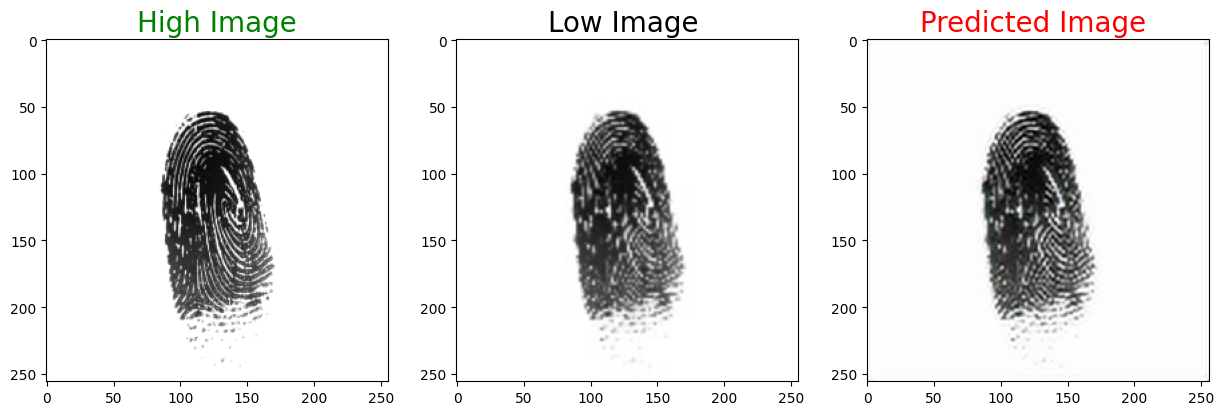

PSNR tf.Tensor(23.66558, shape=(), dtype=float32) dB SSIM tf.Tensor(0.91389084, shape=(), dtype=float32)
5
1/1 [==============================] - 0s 43ms/step


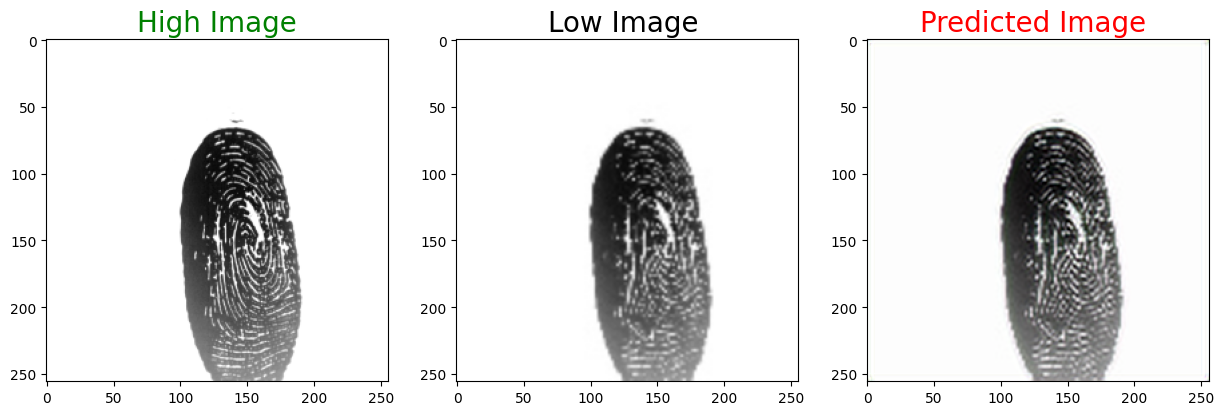

PSNR tf.Tensor(24.498682, shape=(), dtype=float32) dB SSIM tf.Tensor(0.91361094, shape=(), dtype=float32)


In [10]:
def plot_images(high,low,predicted):
    plt.figure(figsize=(15,15))
    plt.subplot(1,3,1)
    plt.title('High Image', color = 'green', fontsize = 20)
    plt.imshow(high)
    plt.subplot(1,3,2)
    plt.title('Low Image ', color = 'black', fontsize = 20)
    plt.imshow(low)
    plt.subplot(1,3,3)
    plt.title('Predicted Image ', color = 'Red', fontsize = 20)
    plt.imshow(predicted)
   
    plt.show()

print(test_low_image)

for i in range(0,6):
    print(i)
    predicted = np.clip(SRCNN.predict(test_low_image[i].reshape(1,SIZE, SIZE,3)),0.0,1.0).reshape(SIZE, SIZE,3)
    plot_images(test_high_image[i],test_low_image[i],predicted)
    print('PSNR',PSNR(test_high_image[i],predicted),'dB', "SSIM",tf.image.ssim(test_high_image[i],predicted,max_val=1))

In [ ]:
!zip -r HighResolution.zip HighResolution

In [ ]:
!zip -r LowResolution.zip LowResolution

In [14]:
def sorted_alphanumeric(data):  
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
    return sorted(data,key = alphanum_key)
# defining the size of the image
#SIZE = 512
high_img = []
path = '/content/sample_data/HighResolution'
files = os.listdir(path)
files = sorted_alphanumeric(files)
for i in tqdm(files):    
    if i == '102_3.png':
        break
    else:    
        img = cv2.imread(path + '/'+i,1)
        # open cv reads images in BGR format so we have to convert it to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        #resizing image
        img = cv2.resize(img, (SIZE, SIZE))
        img = img.astype('float32') / 255.0
        high_img.append(img_to_array(img))



100%|██████████| 66/66 [00:00<00:00, 150.84it/s]


In [15]:
low_img = []
path = '/content/sample_data/LowResolution'
files = os.listdir(path)
files = sorted_alphanumeric(files)
for i in tqdm(files):
    if i == '5.png':
        break
    else: 
        img = cv2.imread(path + '/'+i,1)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        #img = downsample_image(img,4)
        #resizing image
        img = cv2.resize(img, (SIZE, SIZE))
        img = img.astype('float32') / 255.0
        #img = downsample_image(img,2)
        low_img.append(img_to_array(img))
        
sett_high_image = high_img[1:]
sett_low_image = low_img[1:]
sett_high_image= np.reshape(sett_high_image,(len(sett_high_image),SIZE, SIZE,3))
sett_low_image = np.reshape(sett_low_image,(len(sett_low_image),SIZE,SIZE,3))

100%|██████████| 66/66 [00:00<00:00, 1093.54it/s]


1/1 [==============================] - 0s 32ms/step


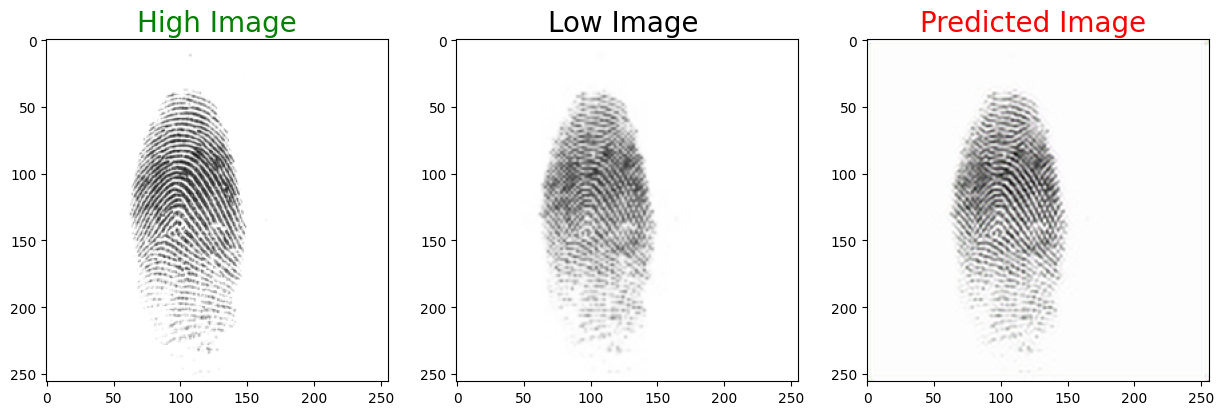

PSNR tf.Tensor(23.966362, shape=(), dtype=float32) dB SSIM tf.Tensor(0.9084901, shape=(), dtype=float32)
1/1 [==============================] - 0s 32ms/step


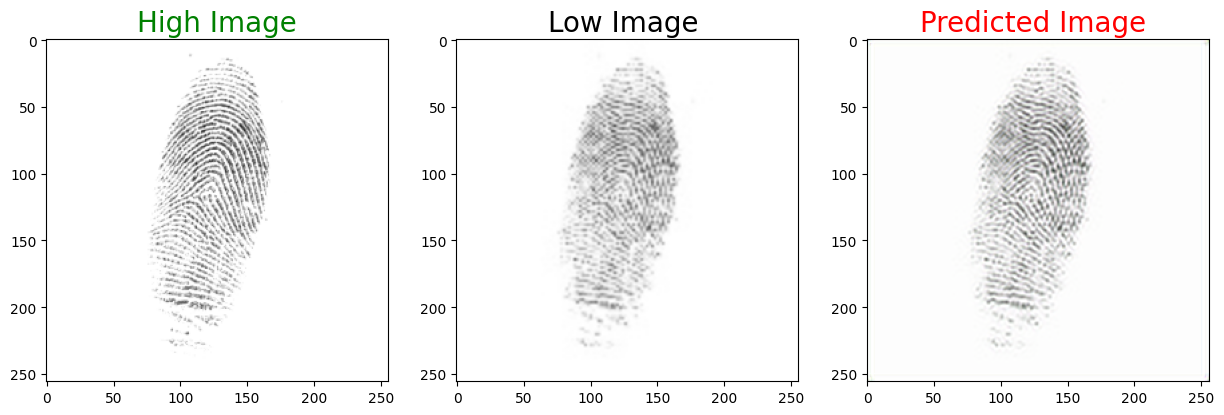

PSNR tf.Tensor(24.779665, shape=(), dtype=float32) dB SSIM tf.Tensor(0.89552206, shape=(), dtype=float32)
1/1 [==============================] - 0s 41ms/step


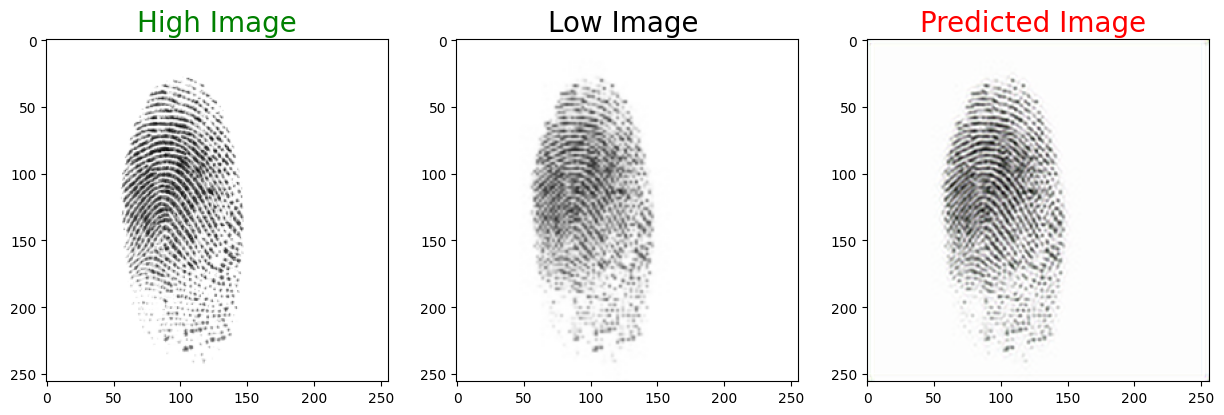

PSNR tf.Tensor(24.374763, shape=(), dtype=float32) dB SSIM tf.Tensor(0.92316407, shape=(), dtype=float32)
1/1 [==============================] - 0s 23ms/step


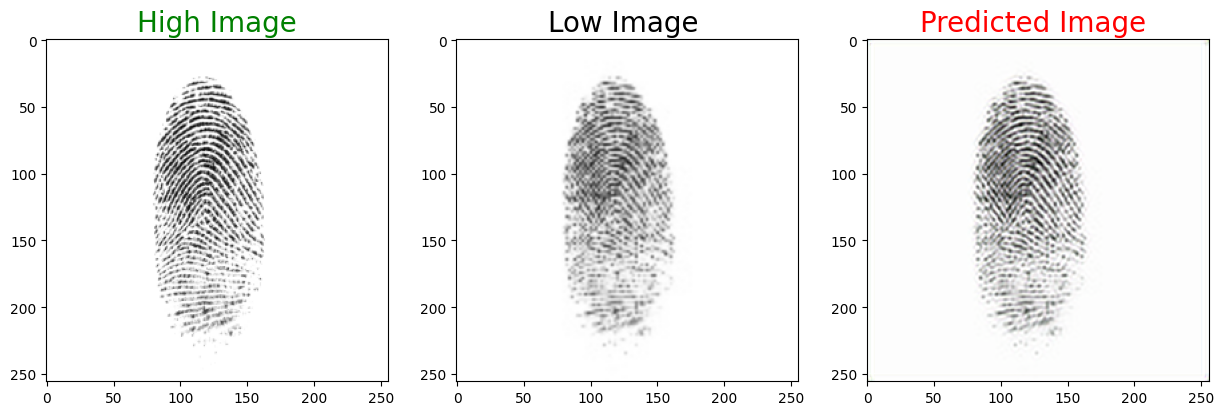

PSNR tf.Tensor(23.46339, shape=(), dtype=float32) dB SSIM tf.Tensor(0.92128783, shape=(), dtype=float32)


In [16]:
def plot_images(high,low,predicted):
    plt.figure(figsize=(15,15))
    plt.subplot(1,3,1)
    plt.title('High Image', color = 'green', fontsize = 20)
    plt.imshow(high)
    plt.subplot(1,3,2)
    plt.title('Low Image ', color = 'black', fontsize = 20)
    plt.imshow(low)
    plt.subplot(1,3,3)
    plt.title('Predicted Image ', color = 'Red', fontsize = 20)
    plt.imshow(predicted)
   
    plt.show()

for i in range(0,4):
    
    predicted = np.clip(SRCNN.predict(sett_low_image[i].reshape(1,SIZE, SIZE,3)),0.0,1.0).reshape(SIZE, SIZE,3)
    plot_images(sett_high_image[i],sett_low_image[i],predicted)
    print('PSNR',PSNR(sett_high_image[i],predicted),'dB',"SSIM",tf.image.ssim(sett_high_image[i],predicted,max_val=1))